In [1]:
cd /g/data/jk72/deg581/seqom/analysis/notebooks

/g/data/jk72/deg581/seqom/analysis/notebooks


In [2]:
# load modules
## Data processing and DA modules
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
## Dealing with big data and netcdf
import xarray as xr
from netCDF4 import Dataset
## ROMS packages
from xgcm import Grid
## color maps
import cmaps
import cmocean
## mapping packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
## System tools and python configuration
import os
import glob
import repackage
repackage.add('../../')
repackage.add('../')

'/jobfs/108309855.gadi-pbs'

In [3]:
# Suite for Analysis - Overview

# script needs to:
# load 1-5 variables from multiple files
# run some calculation and concatenate together
# make some plots

In [12]:


FilePath='/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/' # Truth file settings
prefix='roms_his_'
timeRange = [11, 21]
datelist = np.array(range(timeRange[0],timeRange[1],1))

def add_zeros_to_4(date):
    if date<10:
        to_add = '000'
    elif date>9 & date<100:
        to_add = '00'
    elif date>99 & date < 1000:
        to_add = '0'
    else: 
        to_add = ''
    return to_add

def generateFileList(FilePath,prefix,datelist):
    filelist=[FilePath+prefix+add_zeros_to_4(datelist[0])+str(datelist[0])+'.nc']
    for dates in datelist[1:]:
        filenameToAppend=FilePath+prefix+add_zeros_to_4(dates)+str(dates)+'.nc'
        filelist.append(filenameToAppend)
    return filelist

fl=generateFileList(FilePath,prefix,datelist)
print(fl)

# ds=loadOverlappedNetcdfFileList(filelist=fl,overlapDays=7)

ds = xr.open_mfdataset(fl,chunks = {'ocean_time':1}, data_vars='minimal', compat='override',coords='minimal',parallel='False',join='right')

print(ds.nbytes/1e9,'G')

['/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0011.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0012.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0013.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0014.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0015.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0016.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0017.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0018.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0019.nc', '/g/data/jk72/deg581/seqom/seqld_daily_1yr_DailyNudge_2018again/roms_his_0020.nc']
1793.459163836 G


In [15]:
ds = ds.drop_vars(['rho','u','v','u_eastward','v_northward','ubar_eastward','vbar_northward','w','salt','shflux','ssflux','sustr','svstr','zeta'])
print(ds.nbytes/1e9,'G')
ds

217.313243836 G


<xarray.Dataset>
Dimensions:         (tracer: 2, boundary: 4, s_rho: 31, s_w: 32, Nuser: 1,
                     eta_rho: 600, xi_rho: 800, eta_u: 600, xi_u: 799,
                     eta_v: 599, xi_v: 800, eta_psi: 599, xi_psi: 799,
                     ocean_time: 3650)
Coordinates:
  * s_rho           (s_rho) float64 -0.9839 -0.9516 ... -0.04839 -0.01613
  * s_w             (s_w) float64 -1.0 -0.9677 -0.9355 ... -0.06452 -0.03226 0.0
    x_rho           (eta_rho, xi_rho) float64 dask.array<chunksize=(600, 800), meta=np.ndarray>
    y_rho           (eta_rho, xi_rho) float64 dask.array<chunksize=(600, 800), meta=np.ndarray>
    x_u             (eta_u, xi_u) float64 dask.array<chunksize=(600, 799), meta=np.ndarray>
    y_u             (eta_u, xi_u) float64 dask.array<chunksize=(600, 799), meta=np.ndarray>
    x_v             (eta_v, xi_v) float64 dask.array<chunksize=(599, 800), meta=np.ndarray>
    y_v             (eta_v, xi_v) float64 dask.array<chunksize=(599, 800), meta=np.ndarray>
    x_psi           (eta_psi, xi_psi) float64 dask.array<chunksize=(599, 799), meta=np.ndarray>
    y_psi           (eta_psi, xi_psi) float64 dask.array<chunksize=(599, 799), meta=np.ndarray>
  * ocean_time      (ocean_time) datetime64[ns] 2016-12-30 ... 2026-12-27
Dimensions without coordinates: tracer, boundary, Nuser, eta_rho, xi_rho,
                                eta_u, xi_u, eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/86)
    ntimes          int32 ...
    ndtfast         int32 ...
    dt              float64 ...
    dtfast          float64 ...
    dstart          datetime64[ns] ...
    nHIS            int32 ...
    ...              ...
    angle           (eta_rho, xi_rho) float64 dask.array<chunksize=(600, 800), meta=np.ndarray>
    mask_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(600, 800), meta=np.ndarray>
    mask_u          (eta_u, xi_u) float64 dask.array<chunksize=(600, 799), meta=np.ndarray>
    mask_v          (eta_v, xi_v) float64 dask.array<chunksize=(599, 800), meta=np.ndarray>
    mask_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(599, 799), meta=np.ndarray>
    temp            (ocean_time, s_rho, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 31, 600, 800), meta=np.ndarray>
Attributes: (12/34)
    file:              roms_his_0011.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             South-east Queensland, 1/100 (900m) degree resolution
    var_info:          ROMS/External/varinfo.yaml
    ...                ...
    compiler_command:  /apps/openmpi/4.0.2/bin/mpif90
    compiler_flags:    -fp-model precise -heap-arrays -ip -O3 -traceback -che...
    tiling:            024x020
    history:           ROMS/TOMS, Version 4.2, Thursday - February 8, 2024 - ...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       SEQLD, ANA_BSFLUX, ANA_BTFLUX, ASSUMED_SHAPE, BOUNDARY...

In [ ]:
# # special addition because x_rho and y_rho are in grd file only - update this to remove once re-run
# grd = xr.open_dataset('/g/data/jk72/deg581/shackleton-setup/data/proc/shac_2km_v1_grd.nc')
# ds['x_rho'] = grd.x_rho
# ds['y_rho'] = grd.y_rho

In [ ]:
# # make masks
# # now make a ROI mask(s)
# plt.figure(figsize=(15,15))
# ds.mask_rho.plot(x='x_rho',y='y_rho')
# plt.grid()
# poly_shelf1 = np.array([
#      [2.5e6,-380000],
#      [2.5e6,-420000],
#      [2.55e6,-427000],
#      [2.57e6,-415000],
#      [2.5e6,-361000]]) # denman glacier ice shelf
# plt.plot(poly_shelf1[:,0],poly_shelf1[:,1])
# poly_shelf2 = np.array([
#      [2.525e6,-463000],
#      [2.525e6,-475000],
#      [2.56e6,-475000],
#      [2.56e6,-463000]]) # scott glacier ice shelf
# plt.plot(poly_shelf2[:,0],poly_shelf2[:,1])
# plt.show()

# def inpolygon(xq, yq, xv, yv):
#     from matplotlib import path
#     shape = xq.shape
#     xq = xq.reshape(-1)
#     yq = yq.reshape(-1)
#     xv = xv.reshape(-1)
#     yv = yv.reshape(-1)
#     q = [(xq[i], yq[i]) for i in range(xq.shape[0])]
#     p = path.Path([(xv[i], yv[i]) for i in range(xv.shape[0])])
#     return p.contains_points(q).reshape(shape)


# mask_roi1 = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf1[:,0], poly_shelf1[:,1])
# mask_roi2 = inpolygon(ds.x_rho.values, ds.y_rho.values,poly_shelf2[:,0], poly_shelf2[:,1])

# roi_label1 = 'shelf'
# roi_label2 = 'MB'
# ds['mask_zice_roi1'] = ds.mask_zice*mask_roi1
# ds.mask_zice_roi1.attrs['long_name']=roi_label1
# ds['mask_zice_roi2'] = ds.mask_zice*mask_roi2
# ds.mask_zice_roi2.attrs['long_name']=roi_label2

# # ds.mask_zice_roi.plot()

In [21]:
# set any grid data here.

weights = (1/ds.pm)*(1/ds.pn)
weights.name = "weights"

print('making vertical coordinates')
Zo_rho = (ds.hc * ds.s_rho + ds.Cs_r * ds.h) / (ds.hc + ds.h)
z_rho = (ds.h) * Zo_rho
Zo_w = (ds.hc * ds.s_w + ds.Cs_w * ds.h) / (ds.hc + ds.h)
z_w = Zo_w * ( ds.h) 
    
ds.coords['z_w'] = z_w.where(ds.mask_rho, 0).transpose( 's_w', 'eta_rho', 'xi_rho')
ds.coords['z_rho0'] = z_rho.where(ds.mask_rho, 0).transpose('s_rho', 'eta_rho', 'xi_rho')
# ds.coords['z_rho0'] = z_rho.mean(dim='ocean_time')
# ds["z_rho0"] = ds.z_rho0.fillna(0)

ds['dz'] = (('s_rho', 'eta_rho', 'xi_rho'),np.diff(ds.z_w,axis=0))



making vertical coordinates


# ocean heat content

In [22]:
# plot heat content
#OHC = rho0*cp0*dV*dT
dV = (1/ds.pm)*(1/ds.pn)*ds.dz
rho0=1026
cp0=4181.3
OHC=1026*4181.3*dV*(ds.temp+273.15)


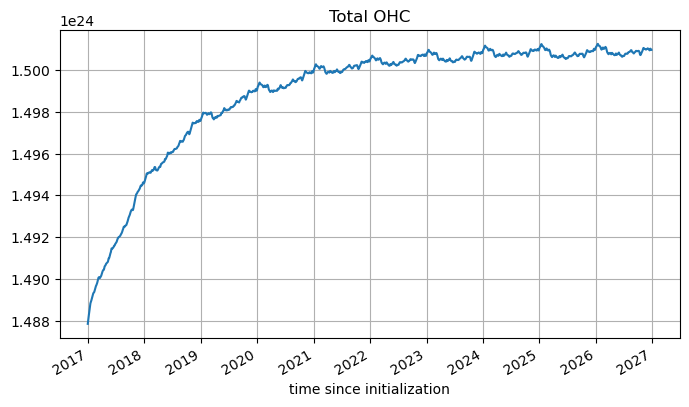

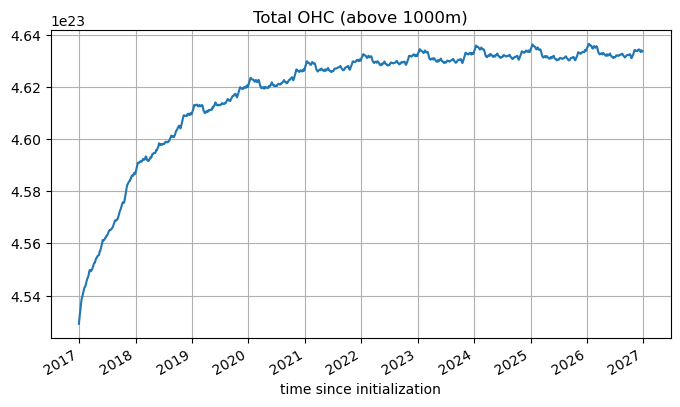

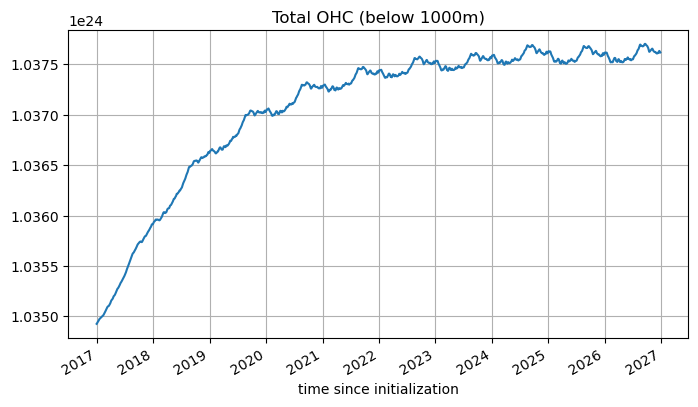

In [23]:
# plot total OHC
TotalOHC = OHC.sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC.plot()
plt.title('Total OHC')
plt.grid()
plt.show()
TotalOHC_above1000 = OHC.where((ds.z_rho0>-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_above1000.plot()
plt.title('Total OHC (above 1000m)')
plt.grid()
plt.show()
TotalOHC_below1000 = OHC.where((ds.z_rho0<-1000).compute(), drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
plt.figure(figsize=(8,4))
TotalOHC_below1000.plot()
plt.title('Total OHC (below 1000m)')
plt.grid()

In [ ]:
# # plot under ice OHC

# TotalOHC_subIce = OHC.where(ds.mask_zice.compute(),drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
# plt.figure(figsize=(8,4))
# TotalOHC_subIce.plot()
# plt.title('Total OHC (below ice shelf)')
# plt.grid()
# TotalOHC_subIce_roi = OHC.where(ds.mask_zice_roi1.compute(),drop=True).sum(dim='xi_rho').sum(dim='eta_rho').sum(dim='s_rho')
# plt.figure(figsize=(8,4))
# TotalOHC_subIce_roi.plot()
# plt.title('Total OHC (below denman)')
# plt.grid()
